In [222]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
import folium
from shapely.geometry import Point

from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

# from pysal.contrib.viz import mapping as maps

In [84]:
# with open('data/drivers.json') as train_file:
#     dict_train = json.load(train_file)
# temp = pd.io.json.json_normalize(dict_train)
# # location.__type only has NAN and GeoPoint and NAN doesn't mean no location
# temp
# temp = temp.drop(columns=['id', 'location.__type', 'location'])
# temp.to_csv('data/driver.csv')
# # drop over 6 tags

# Хора и улици, Лалета и Граждани

## Къде се паркира най-неправилно?
## Как се отразява въвеждането на платено паркиране върху броя на сигналите?
## Как се отразява същото на съседните квартали с нерегулирано паркиране?
## Кога има бум на сигнали?

In [254]:
# data cleanup
data = pd.read_csv('data/driver.csv', low_memory=False)
data.rename(index=str, columns={"location.latitude": "latitude", "location.longitude": "longitude"}, inplace=True)
data
# see data with no latitude or longtitude
print("Latitude, Longtitude is null:")
print(data['latitude'].isnull().sum())
print(data['longitude'].isnull().sum())
data = data[np.isfinite(data['latitude'])]
print("Latitude, Longtitude is null:")
print(data['latitude'].isnull().sum())
print(data['longitude'].isnull().sum())
data

createdAt               dateTaken       licensePlate  \
1      2015-09-12 10:57:10.258 2015-09-12 10:57:10.258            A6888BP   
3      2016-09-22 10:19:16.497 2016-09-22 10:17:00.000           CT9441AK   
4      2016-04-30 19:59:15.623 2016-04-30 19:59:15.623           CA1695MC   
5      2016-09-04 17:57:16.637 2016-09-04 17:55:00.000            E3000AB   
6      2016-12-07 10:50:49.954 2016-12-07 10:48:00.000           CB6467AP   
7      2015-07-24 12:46:34.623 2015-07-24 12:46:34.623            A9292KM   
8      2015-06-24 08:14:20.986 2015-06-24 08:14:20.986           CA7848TB   
10     2016-12-22 12:56:12.515 2016-12-22 12:55:00.000           CA7388TX   
12     2015-08-25 08:55:21.257 2015-08-25 08:55:21.257            X8273BP   
13     2015-10-25 20:50:25.278 2015-10-25 20:50:25.278           CA5143HM   
15     2016-06-30 15:55:07.101 2016-06-30 15:52:00.000           CB8929BA   
16     2016-03-18 11:24:45.159 2016-03-18 11:24:45.159           CB9509AX   
17     2016-03-02 17:27:19.586 2016-03-02 17:27:19.586           CA5855MX   
18     2015-03-15 11:25:43.239 2015-03-15 11:25:43.239            B1723PC   
22     2015-12-21 10:53:06.597 2015-12-21 10:53:06.597           PB5943PX   
23     2016-12-29 07:54:25.151 2016-12-29 07:51:00.000           CB9054AK   
26     2016-04-23 09:09:00.041 2016-04-23 09:09:00.041           CO0848BH   
27     2016-03-28 18:51:01.442 2016-03-28 18:51:01.442           CA7385PB   
29     2015-06-19 20:23:16.033 2015-06-19 20:23:16.033            B1010HK   
30     2015-04-12 21:36:45.247 2015-04-12 21:36:45.247            B3987AT   
31     2016-05-16 12:30:47.663 2016-05-16 12:30:47.663           CA0895XC   
32     2015-12-14 09:49:50.115 2015-12-14 09:49:50.115           CA8757TC   
34     2017-05-17 12:19:04.359 2017-05-17 12:16:00.000           CA2948MB   
38     2015-11-26 17:13:30.939 2015-11-26 17:13:30.939           CA1668XP   
40     2015-05-24 11:14:17.097 2015-05-24 11:14:17.097           CA7454TH   
42     2015-04-02 17:02:17.037 2015-04-02 17:02:17.037           PB1681MX   
43     2015-09-03 13:09:32.376 2015-09-03 13:09:32.376           CB2315AM   
44     2016-04-06 11:45:10.419 2016-04-06 11:45:10.419           CA7522MA   
45     2015-08-20 09:15:36.415 2015-08-20 09:15:36.415           BH5136BM   
46     2015-03-19 07:53:23.277 2015-03-19 07:53:23.277           CA2399XA   
48     2016-07-01 19:57:18.902 2016-06-28 17:37:00.000           CB4711BB   
50     2016-03-18 06:45:34.967 2016-03-18 06:45:34.967            P8323AT   
51     2016-04-01 12:12:34.678 2016-04-01 12:12:34.678           CA7492CX   
52     2015-03-15 15:21:56.659 2015-03-15 15:21:56.659           CA1401CT   
53     2015-03-22 12:21:50.632 2015-03-22 12:21:50.632            B5333BA   
54     2016-08-27 08:55:35.089 2016-08-27 08:49:00.000           CO4273BP   
55     2017-04-07 04:45:25.896 2017-04-06 15:44:00.000           CA8469TT   
56     2017-03-10 16:17:12.012 2017-03-10 16:15:00.000           CA8255XT   
57     2015-05-22 12:13:55.241 2015-05-22 12:13:55.241            A8880MP   
61     2015-03-31 12:25:29.275 2015-03-31 12:25:29.275           CB8659AB   
63     2016-10-03 19:38:53.948 2016-10-02 07:30:00.000           PB3762PC   
64     2015-05-18 13:23:05.329 2015-05-18 13:23:05.329           CA0293CT   
66     2016-05-09 21:35:57.944 2016-05-09 21:35:57.944            C8787HK   
68     2015-10-25 11:32:04.838 2015-10-25 11:32:04.838            B2397KC   
71     2017-02-07 14:23:38.458 2017-02-07 13:31:00.000           CA3521XC   
72     2015-09-05 19:55:11.703 2015-09-05 19:55:11.703           PB9192AM   
73     2015-03-28 16:32:25.552 2015-03-28 16:32:25.552            K5963BB   
74     2015-04-17 06:50:21.651 2015-04-17 06:50:21.651            B1511PK   
76     2015-04-30 15:38:58.405 2015-04-30 15:38:58.405           CA0558XC   
77     2017-01-03 12:49:08.544 2017-01-03 12:47:00.000           CA9707PP   
78     2015-09-17 21:06:51.570 2015-09-17 21:06:51.570            C6393KP   
81     2015-03-16

In [86]:
#convert createdAt and dateTaken to datetime format
data.createdAt = pd.to_datetime(data.createdAt)

# impute dateTaken to be similar to createdAt when is nan
# a different aproach is to subtract the mean between createdAt and dateTaken
data.dateTaken = data.apply(
    lambda row: row['createdAt'] if pd.isnull(row['dateTaken']) else row['dateTaken'], axis=1)

data.dateTaken = pd.to_datetime(data.dateTaken)

In [87]:
# select illegal parking problems
data.selectedTags1.unique()
# remove quotes and smiles in the Tags
# ...
# strip selectedTags
selected_tags_list = []
for i in range(1,7):
    selected_tags_list.append('selectedTags' + str(i))
    data['selectedTags' + str(i)] = data['selectedTags' + str(i)].str.strip()

driver_tags = list(set(data.selectedTags1.unique()) | set(data.selectedTags2.unique()) | set(data.selectedTags3.unique()) | 
     set(data.selectedTags4.unique()) | set(data.selectedTags5.unique()) | set(data.selectedTags6.unique()))
driver_tags

parking_rename_map = {"Паркиране/Спиране на пешеходна пътека": "Паркиране пешеходна",
                    "Паркиране на кръстовище": "Паркиране кръстовище",
                    "Неправилно паркиране": "Паркиране неправилно",
                    "Паркиране на автобусна спирка": "Паркиране спирка",
                    "Паркиране на тротоар": "Паркиране тротоар",
                    "Блокиране на вход": "Паркиране вход",
                    "Паркиране/движение по велоалея след знак Г14/16": "Паркиране велоалея",
                    "Паркиране на инвалидно място": "Паркиране инвалидно",
                    "Паркиране на таксиметрова стоянка": "Паркиране стоянка",
                    "Нарушение след знак В27 или В28 (Паркиране или престой)": "Паркиране знакБ",
                    "Паркиране/Шофиране в парк": "Паркиране парк",
                    "Паркиране whatever...": "Паркиране нагло",
                    "Паркиране на зелени площи": "Паркиране зелени"
                     }

for tag in selected_tags_list:
    data[tag] = data[tag].map(parking_rename_map)

In [88]:
# filter illegal parking problems in parking_data
parking_data_mask = data[selected_tags_list].stack(dropna=False).str.contains('Паркиране').unstack().any(axis='columns')
parking_data = data[parking_data_mask].copy()
# parking_data[selected_tags_list].stack().value_counts()

# add illegal parking column to data
data['illegal_parking'] = parking_data_mask

In [89]:
for value in parking_rename_map.values():
    data[value] = data[selected_tags_list].stack(dropna=False).str.contains(value).unstack().any(axis='columns')
    parking_data[value] = parking_data[selected_tags_list].stack(dropna=False).str.contains(value).unstack().any(axis='columns')

In [90]:
# drop not needed columns
pd.options.display.max_columns = 32
parking_data.drop(columns=selected_tags_list, inplace=True)
parking_data.drop(columns=['pictures'], inplace=True)

In [91]:
pd.options.display.max_rows = 512
parking_data.licensePlate.replace('\d+\w+.+$', '', regex=True, inplace=True)

# replace misstyped registration numbers
license_plate_map = {'SA': 'CA', 
                    'SV': 'CB', 
                    'XX': 'XX', 
                    'V': 'B', 
                    'ST': 'CT', 
                    'R': 'P', 
                    'EN': 'EH', 
                    'SM': 'CM', 
                    'TH': 'TX', 
                    'RV': 'PB', 
                    'СA': 'CA', 
                    'СB': 'CB', 
                    'AA': 'AA', 
                    'CV': 'CB', 
                    'С': 'C', 
                    'SS': 'CC', 
                    'S': 'C', 
                    'SN': 'CH', 
                    'VT': 'BT', 
                    'KN': 'KH', 
                    'VR': 'BP', 
                    'W': 'B', 
                    'SO': 'CO', 
                    'SB': 'CB', 
                    'EV': 'EB', 
                    'ВP': 'BP', 
                    'ОB': 'OB', 
                    'H': 'H', 
                    'A': 'A', 
                    'ТX': 'TX', 
                    'PV': 'PB', 
                    'CБ': 'CB', 
                    'SW': 'CB'
}

parking_data.licensePlate.replace(license_plate_map.keys(), license_plate_map.values(), inplace=True)
licence_plate_counts = parking_data.licensePlate.value_counts()

# remove rows that contain wrong license plate numbers and no license plate numbers
parking_data = parking_data[parking_data.isin(licence_plate_counts.index[licence_plate_counts >= 16]).values]
# remove rows with empty strings for license plates


filter = parking_data['licensePlate'] != ""
parking_data = parking_data[filter]

# parking_data.licensePlate = parking_data.licensePlate.replace('', np.nan, inplace=True)
# parking_data = parking_data.dropna(subset=['licensePlate'], inplace=True)


# parking_data = parking_data[parking_data.isin(licence_plate_counts.index[licence_plate_counts == 146]).values]

In [253]:
print(license_plate_map)

{'SA': 'CA', 'SV': 'CB', 'XX': 'XX', 'V': 'B', 'ST': 'CT', 'R': 'P', 'EN': 'EH', 'SM': 'CM', 'TH': 'TX', 'RV': 'PB', 'СA': 'CA', 'СB': 'CB', 'AA': 'AA', 'CV': 'CB', 'С': 'C', 'SS': 'CC', 'S': 'C', 'SN': 'CH', 'VT': 'BT', 'KN': 'KH', 'VR': 'BP', 'W': 'B', 'SO': 'CO', 'SB': 'CB', 'EV': 'EB', 'ВP': 'BP', 'ОB': 'OB', 'H': 'H', 'A': 'A', 'ТX': 'TX', 'PV': 'PB', 'CБ': 'CB', 'SW': 'CB'}


In [268]:
# Sofia vs the world
sofia_plates = parking_data.licensePlate.str.contains('CB|CA|C').sum()
non_sofia_plates = parking_data.shape[0] - sofia_plates
print("Регистрационни номера с най-много нарушения")
print(data.licensePlate.value_counts()[7:9])
print("Initial data size: 103855")
print("Чистене: премахване на сигнали без локация, сигнали с грешни регистрационни номера на автомобили и сигнали без регистрационни номера")

Регистрационни номера с най-много нарушения
CB3512AC    26
CB6232AP    25
Name: licensePlate, dtype: int64
Initial data size: 103855
Чистене: премахване на сигнали без локация, сигнали с грешни регистрационни номера на автомобили и сигнали без регистрационни номера


In [255]:
parking_data

createdAt               dateTaken licensePlate  \
index_left                                                                
1          2015-09-12 10:57:10.258 2015-09-12 10:57:10.258            A   
3          2016-09-22 10:19:16.497 2016-09-22 10:17:00.000           CT   
4          2016-04-30 19:59:15.623 2016-04-30 19:59:15.623           CA   
5          2016-09-04 17:57:16.637 2016-09-04 17:55:00.000            E   
6          2016-12-07 10:50:49.954 2016-12-07 10:48:00.000           CB   
7          2015-07-24 12:46:34.623 2015-07-24 12:46:34.623            A   
10         2016-12-22 12:56:12.515 2016-12-22 12:55:00.000           CA   
13         2015-10-25 20:50:25.278 2015-10-25 20:50:25.278           CA   
15         2016-06-30 15:55:07.101 2016-06-30 15:52:00.000           CB   
16         2016-03-18 11:24:45.159 2016-03-18 11:24:45.159           CB   
23         2016-12-29 07:54:25.151 2016-12-29 07:51:00.000           CB   
29         2015-06-19 20:23:16.033 2015-06-19 20:23:16.033            B   
30         2015-04-12 21:36:45.247 2015-04-12 21:36:45.247            B   
31         2016-05-16 12:30:47.663 2016-05-16 12:30:47.663           CA   
32         2015-12-14 09:49:50.115 2015-12-14 09:49:50.115           CA   
34         2017-05-17 12:19:04.359 2017-05-17 12:16:00.000           CA   
40         2015-05-24 11:14:17.097 2015-05-24 11:14:17.097           CA   
43         2015-09-03 13:09:32.376 2015-09-03 13:09:32.376           CB   
44         2016-04-06 11:45:10.419 2016-04-06 11:45:10.419           CA   
45         2015-08-20 09:15:36.415 2015-08-20 09:15:36.415           BH   
46         2015-03-19 07:53:23.277 2015-03-19 07:53:23.277           CA   
50         2016-03-18 06:45:34.967 2016-03-18 06:45:34.967            P   
51         2016-04-01 12:12:34.678 2016-04-01 12:12:34.678           CA   
53         2015-03-22 12:21:50.632 2015-03-22 12:21:50.632            B   
54         2016-08-27 08:55:35.089 2016-08-27 08:49:00.000           CO   
57         2015-05-22 12:13:55.241 2015-05-22 12:13:55.241            A   
61         2015-03-31 12:25:29.275 2015-03-31 12:25:29.275           CB   
63         2016-10-03 19:38:53.948 2016-10-02 07:30:00.000           PB   
68         2015-10-25 11:32:04.838 2015-10-25 11:32:04.838            B   
71         2017-02-07 14:23:38.458 2017-02-07 13:31:00.000           CA   
72         2015-09-05 19:55:11.703 2015-09-05 19:55:11.703           PB   
77         2017-01-03 12:49:08.544 2017-01-03 12:47:00.000           CA   
81         2015-03-16 08:04:06.232 2015-03-16 08:04:06.232           CT   
82         2016-03-10 06:55:04.413 2016-03-10 06:55:04.413           PB   
83         2017-02-09 13:16:50.728 2017-02-09 12:50:00.000           CA   
89         2016-11-28 10:40:02.172 2016-11-28 10:39:00.000            K   
95         2015-05-12 09:48:18.359 2015-05-12 09:48:18.359            A   
106        2017-02-25 11:17:39.464 2017-02-25 11:16:00.000            E   
109        2016-11-22 06:15:08.693 2016-11-22 06:11:00.000            A   
113        2016-07-20 11:35:11.140 2016-07-20 11:35:11.140           CA   
117        2017-04-22 16:16:19.245 2017-04-22 16:11:00.000            B   
120        2015-04-02 06:32:21.829 2015-04-02 06:32:21.829           PB   
127        2016-10-03 11:32:08.850 2016-10-03 09:57:00.000            B   
128        2015-04-07 10:58:27.196 2015-04-07 10:58:27.196           BT   
133        2016-08-29 23:05:03.405 2016-08-29 20:40:00.000            C   
135        2015-04-06 17:33:21.003 2015-04-06 17:33:21.003           CB   
139        2017-02-16 19:13:37.693 2017-02-16 19:12:00.000           PB   
142        2016-11-28 18:46:48.801 2016-11-27 14:00:00.000           CA   
144        2016-05-14 12:40:20.438 2016-05-14 12:40:20.438           CO   
146        2015-03-10 22:51:41.768 2015-03-10 22:51:41.768           EB   
147        2017-03-23 10:25:20.995 2017-03-23 10:23:00.000           BP   
149        2015-04-20 16:05:09.824 2015-04-20 16:0

C, CB, CA: 33927 ; as fraction: 0.6546833391223804
Rest of BG: 17895 ; as fraction: 0.34531666087761953


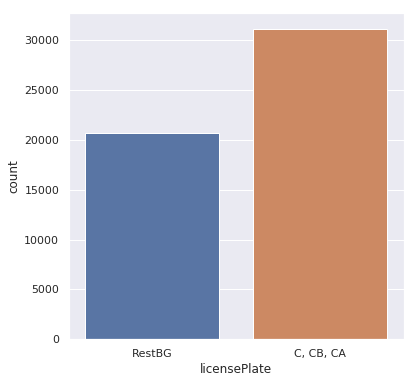

In [267]:
print("C, CB, CA:", sofia_plates, "; as fraction:", sofia_plates/(sofia_plates + non_sofia_plates))
print("Rest of BG:", non_sofia_plates, "; as fraction:", non_sofia_plates/(sofia_plates + non_sofia_plates))
sofia_vs_rest = parking_data.licensePlate.map({'CB': 'C, CB, CA', 'CA': 'C, CB, CA', 'C': 'C, CB, CA'}).fillna('RestBG')
sns.set(style="darkgrid", rc={'figure.figsize':(6,6)})
ax = sns.countplot(sofia_vs_rest)

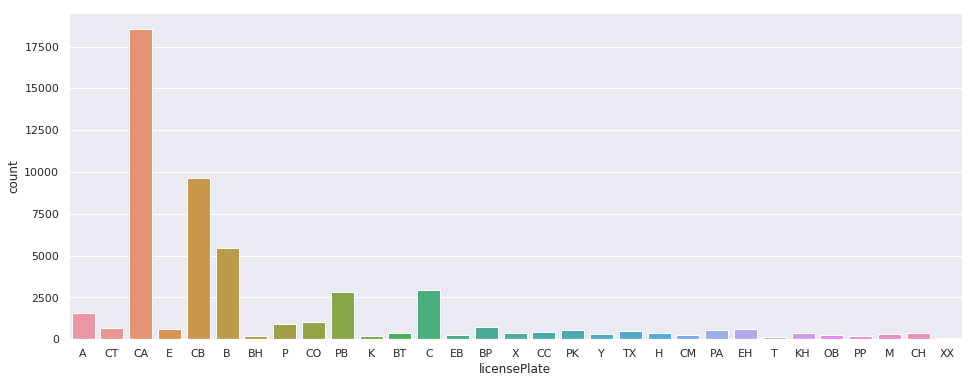

In [93]:
sns.set(style="darkgrid", rc={'figure.figsize':(16,6)})
ax = sns.countplot(x="licensePlate", data=parking_data)

In [261]:
# данни по години, месеци, дни от седмицата
parking_data['yearTaken'] = parking_data['dateTaken'].dt.year
parking_data['monthTaken'] = parking_data['dateTaken'].dt.month
parking_data['weekdayTaken'] = parking_data['dateTaken'].dt.day_name()
parking_data['hourTaken'] = parking_data['dateTaken'].dt.hour

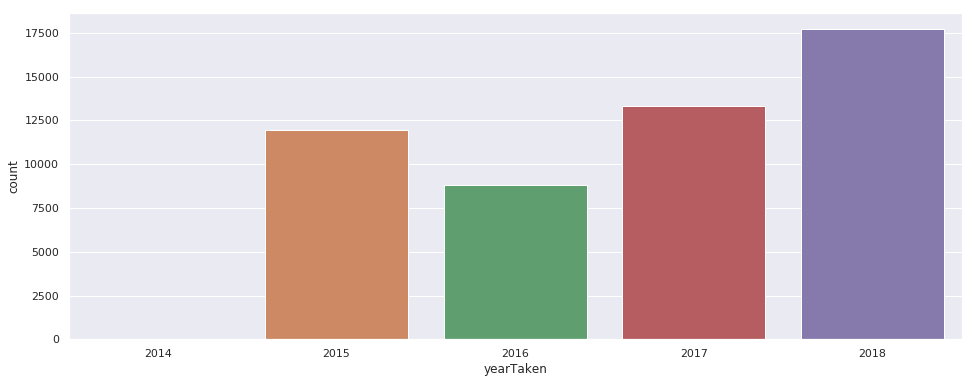

In [260]:
# yearly, monthly, weekday reports
sns.set(style="darkgrid", rc={'figure.figsize':(16,6)})
ax = sns.countplot(x="yearTaken", data=parking_data)

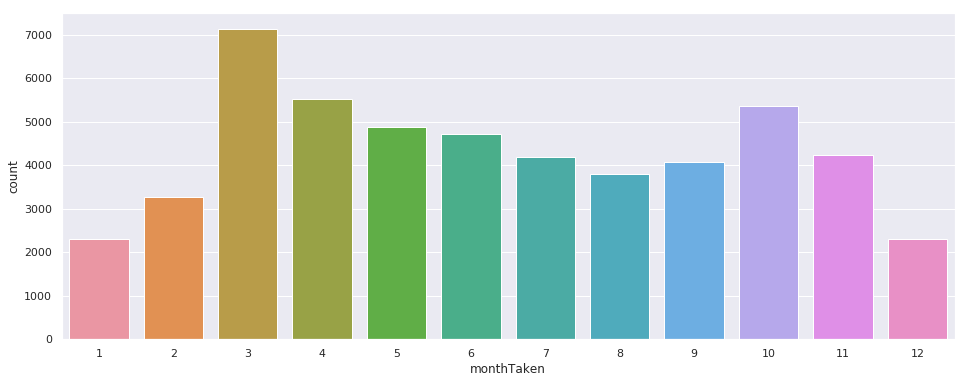

In [95]:
sns.set(style="darkgrid", rc={'figure.figsize':(16,6)})
ax = sns.countplot(x="monthTaken", data=parking_data)

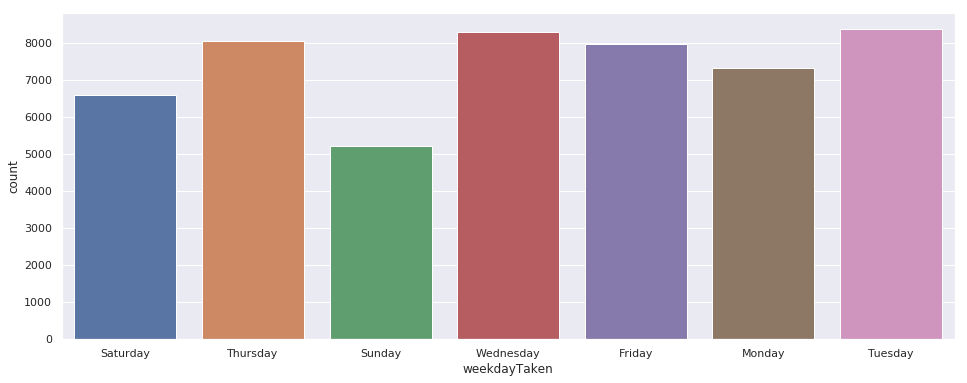

In [96]:
sns.set(style="darkgrid", rc={'figure.figsize':(16,6)})
ax = sns.countplot(x="weekdayTaken", data=parking_data)

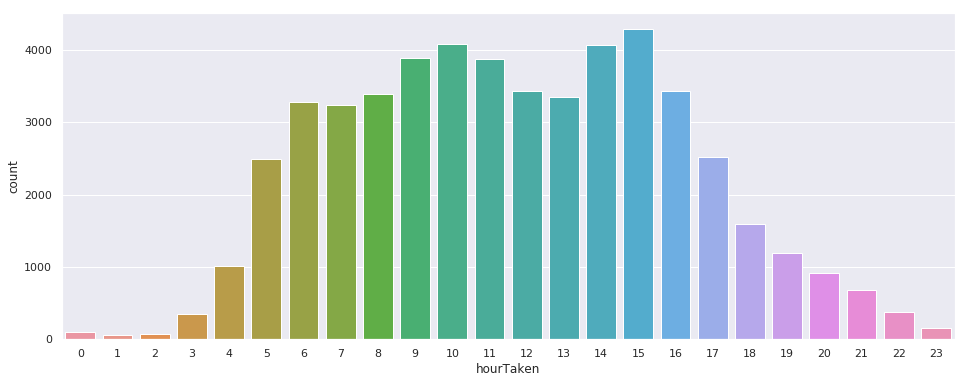

In [97]:
# probably UTC?
sns.set(style="darkgrid", rc={'figure.figsize':(16,6)})
ax = sns.countplot(x="hourTaken", data=parking_data)

In [265]:
labels = tuple(parking_rename_map.values())
sizes = []

[sizes.append(parking_data[val].sum()) for val in parking_rename_map.values()]
# print(labels)
# print(sizes)

# explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice


[None, None, None, None, None, None, None, None, None, None, None, None, None]

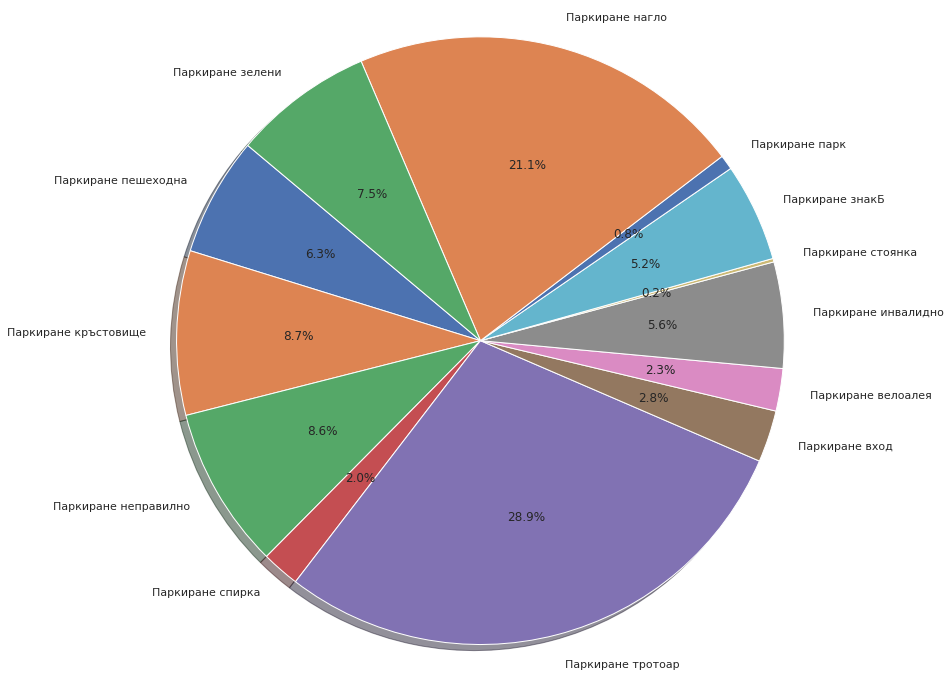

In [275]:
fig_size, fig_size[0], fig_size[1] = plt.rcParams["figure.figsize"], 12, 12
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.rcParams["figure.figsize"] = fig_size; plt.axis('equal'); plt.show()

In [154]:
lsoas_link = 'data/nas_kv_wgs84/Naselenie_kvartali_wgs84.shp'
lsoas = gpd.read_file(lsoas_link)
lsoas.drop(columns=['NSettlemen', 'Broi_Lica', 'Broi_Jil', 'Male', 'Female', 'Age0_14', 'Age15_24', 'Age25_34',
                    'Age35_44', 'Age45_54', 'Age55_64', 'AgeOver65', 'Educ1', 'Educ2', 'Educ3', 'Educ4', 'Educ5'],
          inplace=True)

In [273]:
reg_counts = all.Rajon.value_counts()
print("Най-много проблеми по райони")
print(reg_counts.head(16))

Най-много проблеми по райони
Триадица              3507
Лозенец               3396
Младост               2945
Красно село           2655
Възраждане            2611
Средец                2607
Изгрев                2240
Слатина               2180
Студентска            1664
Оборище               1526
Витоша                1516
Подуене               1191
Люлин                 1088
Овча Купел             900
Лозенец / Триадица     731
Искър                  673
Name: Rajon, dtype: int64


In [266]:
reg_counts = all.RegName.value_counts()
print("\nНай-много проблеми по микрорайони")
print(reg_counts.head(16))


Най-много проблеми по микрорайони
ж.к. Изток - изток            1369
м. Лозенец част 2 и 3 - юг     893
ж.к. Гео Милев                 874
ЦГЧ Зона Г12                   780
ж.к. Младост 4                 736
м.Лозенец част 1               731
м. Лозенец част 3              730
ж.к. Младост 1                 704
НПЗ Хладилника                 677
ж.к. Дианабад                  670
кв. Подуяне                    663
ж.к. Гоце Делчев               642
м. Подуяне-Център              572
ж.к. Хиподрума                 566
ЦГЧ Зони Г10 и част от А       556
ж.к. Стрелбище                 548
Name: RegName, dtype: int64


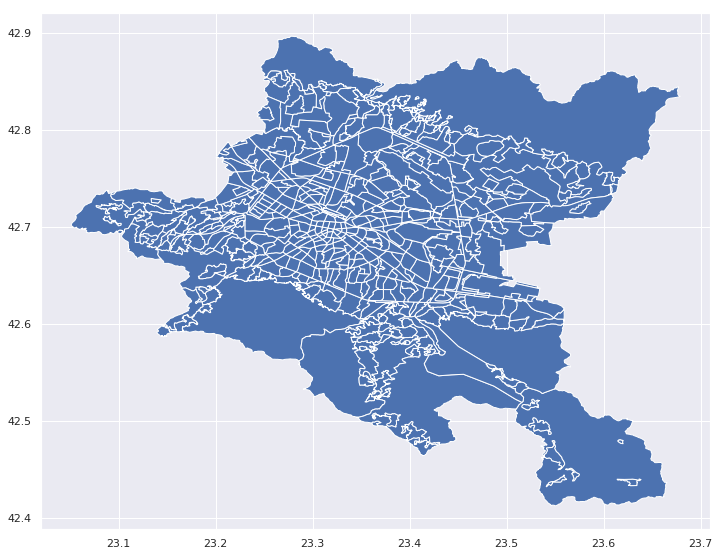

In [155]:
ls = lsoas.plot()

## Имаме карта, имаме координати, имаме време на нарушения.
## Остава само да навържем нещата.

# След 5 часа борба с ГИС, различни координати, Arch linux и какво ли още не...

In [104]:
parking_data.longitude
parking_data['geometry'] = list(zip(parking_data.longitude, parking_data.latitude))
parking_data['geometry'] = parking_data['geometry'].apply(Point)
parking_data = geopandas.GeoDataFrame(parking_data, geometry='geometry')

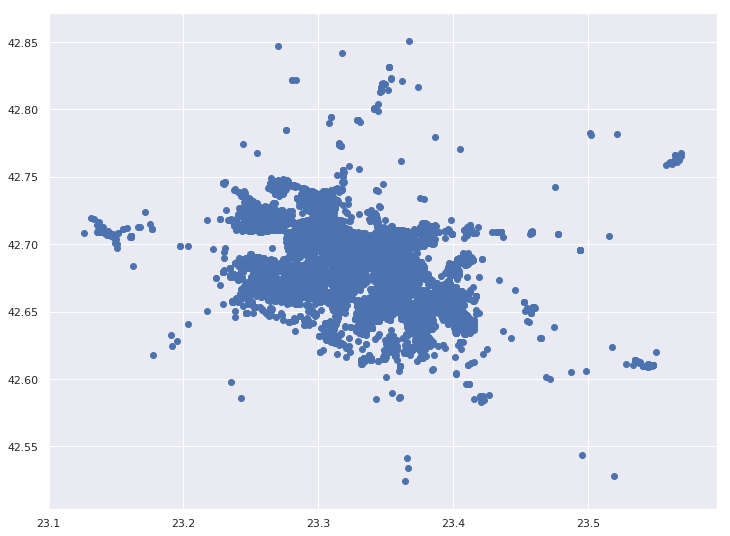

In [218]:
all = geopandas.sjoin(parking_data, lsoas, how="inner", op='within')
allplot = all.plot()

In [219]:
# all['illegal_parking'] = all.apply(lambda state: parking_data.within(all.geometry).sum(), axis=1)
test_dict = dict(all.RegName.value_counts())
lsoas['illegal_parking'] = lsoas['RegName'].map(test_dict)
# df["B"] = df["A"].map(equiv)

# states['wafflehouse_count'] = states.apply(lambda state: wafflehouses.within(state.geometry).sum(), axis=1)

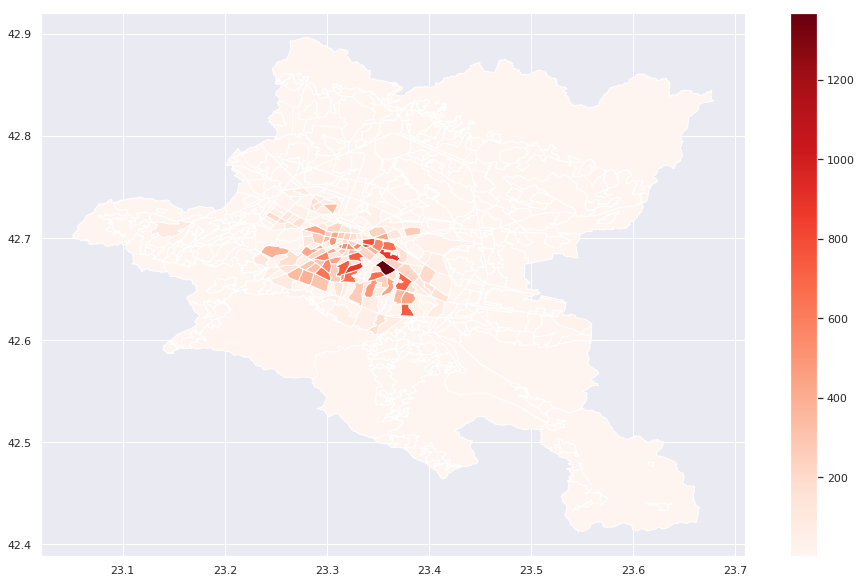

In [250]:
regname_plot = lsoas.plot(column='illegal_parking', legend=True, figsize=(16, 10), cmap='Reds')

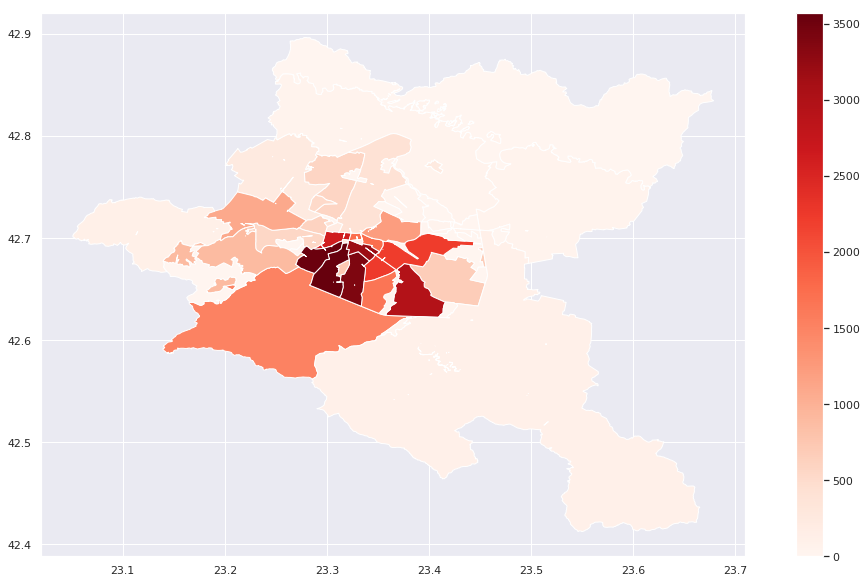

In [247]:
rajon_df = lsoas.dissolve(by='Rajon', aggfunc='sum')
regname_plot = rajon_df.plot(column='illegal_parking', legend=True, figsize=(18,10), cmap='Reds')

## и тук свърши времето...

## но благодарение на усилията на организатори и други участници, както и късметът да бъдеш номер 12...

## В края на 2017-та година в част от кв. Лозенец беше въведена зелена зона
## Нека видим сигналите на месечна и годиша база

In [319]:
lsoas_link = 'data/naselenie_kvartali/greenZone_Lozenets_new.shp'
zelena_zona = gpd.read_file(lsoas_link)
zelena_zona
zelena_zona.crs = parking_data.crs.copy()
zelena_zona
zelena_zona_parking = geopandas.sjoin(parking_data, zelena_zona, how="inner", op='within')
zelena_zona_parking.shape[0]

zelena_zona_parking_2015 = zelena_zona_parking[zelena_zona_parking.yearTaken == 2015]
zelena_zona_parking_2016 = zelena_zona_parking[zelena_zona_parking.yearTaken == 2016]
zelena_zona_parking_2017 = zelena_zona_parking[zelena_zona_parking.yearTaken == 2017]
zelena_zona_parking_2018 = zelena_zona_parking[zelena_zona_parking.yearTaken == 2018]

# zelplot = zelena_zona_parking.plot()

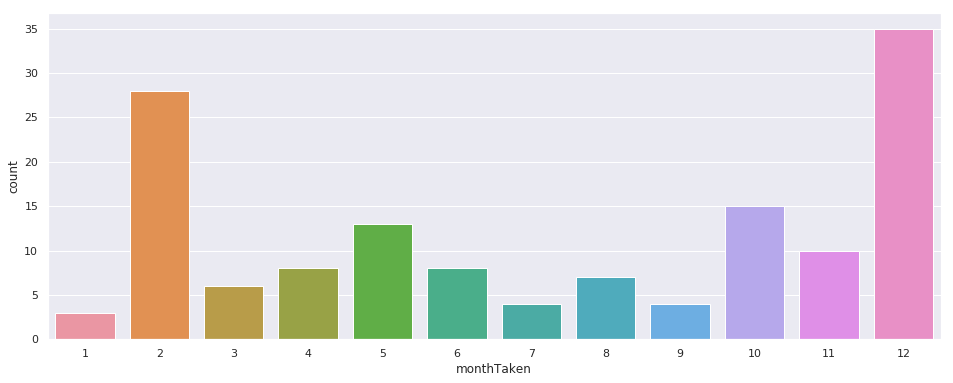

In [322]:
sns.set(style="darkgrid", rc={'figure.figsize':(16,6)})
ax = sns.countplot(x="monthTaken", data=zelena_zona_parking_2016)

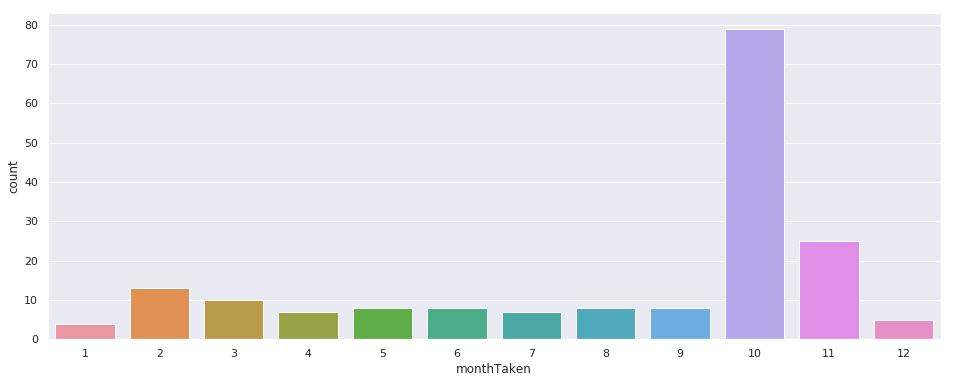

In [320]:
sns.set(style="darkgrid", rc={'figure.figsize':(16,6)})
ax = sns.countplot(x="monthTaken", data=zelena_zona_parking_2017)

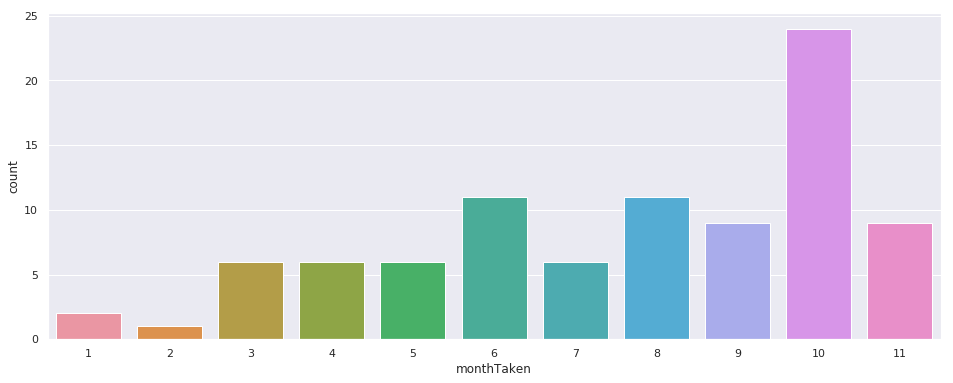

In [321]:
sns.set(style="darkgrid", rc={'figure.figsize':(16,6)})
ax = sns.countplot(x="monthTaken", data=zelena_zona_parking_2018)

## Нека си припомним броя сигнали през различните години
## След 2016-та имаме осезаемо увеличение на годишна база

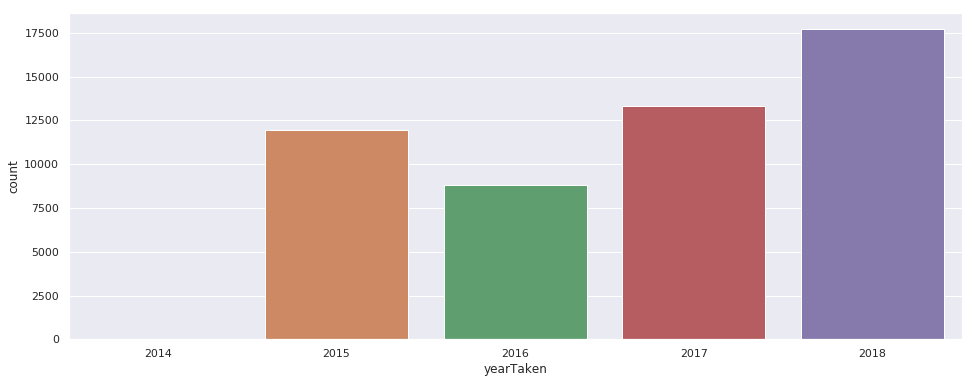

In [325]:
# yearly, monthly, weekday reports
sns.set(style="darkgrid", rc={'figure.figsize':(16,6)})
ax = sns.countplot(x="yearTaken", data=parking_data)

## А какво се случва със сигналите в района на "новата" зелена зона в Лозенец, която влезе в сила в края на 2017-та година?

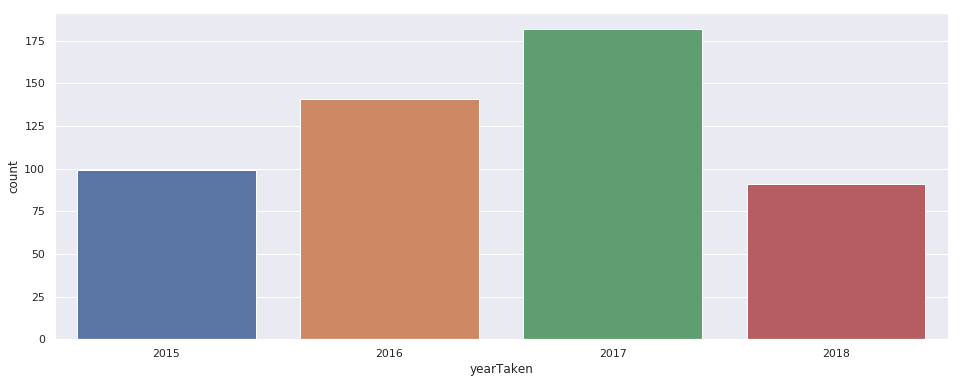

In [323]:
sns.set(style="darkgrid", rc={'figure.figsize':(16,6)})
ax = sns.countplot(x="yearTaken", data=zelena_zona_parking)

# Благодаря! Въпроси?

In [290]:
lsoas[lsoas.Rajon == "Лозенец"]

RegName    Rajon  \
index_right                                                          
106          Парк -Борисова градина - разш. Кръстова вада  Лозенец   
107                                  кв. Витоша - Лозенец  Лозенец   
117                                            м. Зоопарк  Лозенец   
124                                        кв. Хладилника  Лозенец   
135                                        НПЗ Хладилника  Лозенец   
139                   Борисова градина - Погребите част 1  Лозенец   
150                            м. Лозенец част 2 и 3 - юг  Лозенец   
155                             м. Лозенец част 2 - север  Лозенец   
164                        Борисова градина - Семинарията  Лозенец   
175                                     м. Лозенец част 3  Лозенец   
552                             кв. Кръстова вада - изток  Лозенец   

                  Area_m2              X             Y  \
index_right                                              
106          1.155530e+06  690395.147984  4.724220e+06   
107          1.877846e+06  691001.543299  4.724086e+06   
117          3.466194e+05  691133.875789  4.725532e+06   
124          1.814350e+05  689744.606540  4.725828e+06   
135          1.056971e+06  690352.764690  4.725863e+06   
139          7.856083e+05  691191.356286  4.726278e+06   
150          8.714623e+05  690678.355861  4.726880e+06   
155          3.818697e+05  690610.509226  4.727449e+06   
164          4.110908e+05  691459.806532  4.727656e+06   
175          8.472019e+05  690754.412771  4.728088e+06   
552          5.908174e+05  689938.159080  4.724504e+06   

                                                      geometry  \
index_right                                                      
106          POLYGON ((23.3279681798865 42.65638096231112, ...   
107          POLYGON ((23.3216911535871 42.643156299636, 23...   
117          POLYGON ((23.33285889636063 42.655667199174, 2...   
124          POLYGON ((23.31649243817781 42.65930417207674,...   
135          POLYGON ((23.32798266307774 42.65657918431537,...   
139          POLYGON ((23.33592099605644 42.67246483082257,...   
150          POLYGON ((23.3358755422142 42.67242502560004, ...   
155          POLYGON ((23.33373499170379 42.67633350570757,...   
164          POLYGON ((23.3359906713349 42.67270298867579, ...   
175          POLYGON ((23.33564451518406 42.68250294574711,...   
552          POLYGON ((23.31597821725993 42.65678072219249,...   

             illegal_parking  
index_right                   
106                      7.0  
107                    269.0  
117                     25.0  
124                    520.0  
135                    677.0  
139                      6.0  
150                    893.0  
155                    164.0  
164                     21.0  
175                    730.0  
552                     84.0

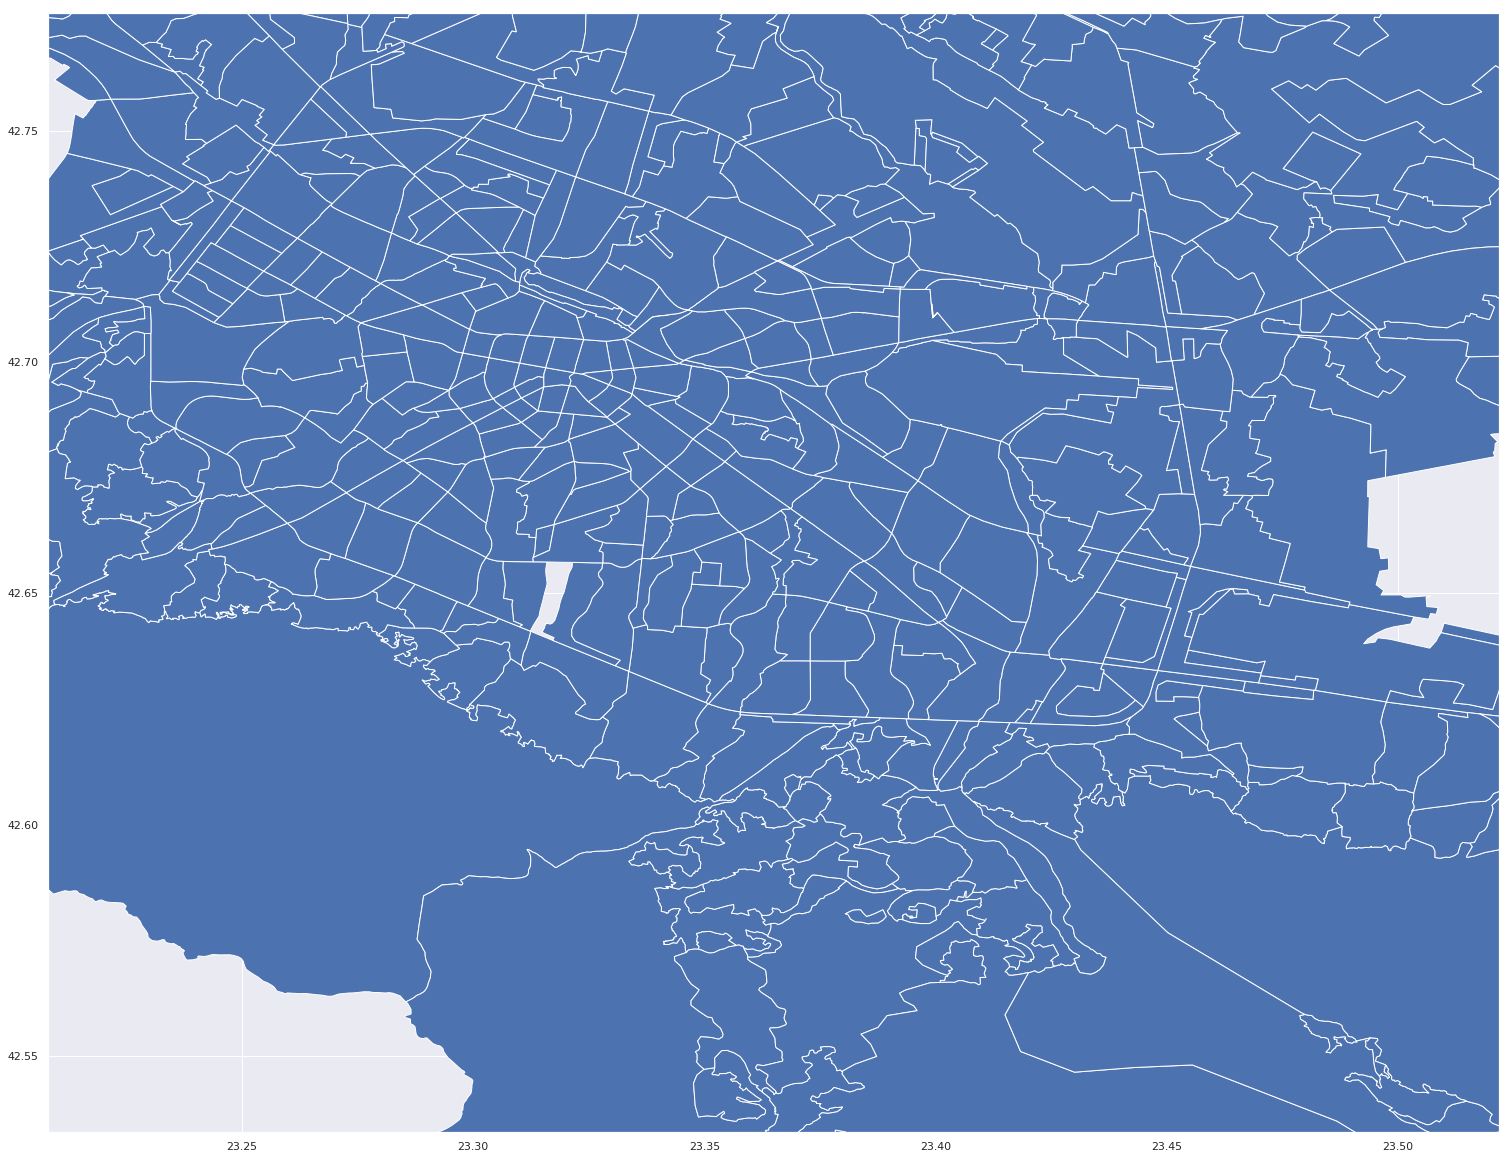

In [295]:
pf = (lsoas.geometry - lsoas.iloc[552].geometry).plot(figsize=(26,26))
pf.margins(x=-0.25, y=-0.25)

In [189]:

for val in reg_counts:
    lsoas['RegName'] == valt

Rajon counts:  Триадица                       3507
Лозенец                        3396
Младост                        2945
Красно село                    2655
Възраждане                     2611
Средец                         2607
Изгрев                         2240
Слатина                        2180
Студентска                     1664
Оборище                        1526
Витоша                         1516
Подуене                        1191
Люлин                          1088
Овча Купел                      900
Лозенец / Триадица              731
Искър                           673
Илинден                         610
Надежда                         581
Красна поляна                   568
Сердика                         394
Надежда / Връбница              259
Връбница                        238
Възраждане / Триадица           225
Сердика / Илинден               222
Средец / Оборище                144
Банкя                           121
Панчарево                       111
Кремиковци   

In [122]:
lsoas.iloc[0].geometry
parking_data.iloc[0].geometry.within(lsoas.iloc[0].geometry)

False

In [168]:
print(lsoas.crs)
parking_data.crs

{'init': 'epsg:32634'}


{'init': 'epsg:32634'}

In [169]:
for i in range(lsoas.shape[0]):
    for j in range(parking_data.shape[0]):
        print(parking_data.iloc[j].geometry)
        print(lsoas.iloc[i].geometry)
        if parking_data.iloc[j].geometry.within(lsoas.iloc[i].geometry):
            print("ga")

POINT (23.2683721 42.7135982)
POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.6

POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

POINT (23.2602722 42.6730691)
POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.6

POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

POINT (27.9070524 43.2179765)
POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.6

POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

POINT (23.3453492303183 42.68572362518029)
POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.4334767

POINT (23.2939888 42.6909005)
POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.6

POINT (24.531396 43.4716355)
POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62

POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

POLYGON ((23.61444963639252 42.43907487722348, 23.61400253331841 42.43930699124301, 23.61392381834118 42.43983652089439, 23.61760181168862 42.43969894599209, 23.6210777095738 42.43960850917732, 23.62753741107647 42.4397557273865, 23.62980844117792 42.43991240787489, 23.6314903571108 42.43965700318952, 23.63389287105131 42.43927286079985, 23.63566139939792 42.43882874307829, 23.63650582830032 42.43927514357164, 23.6363941257932 42.43997256907891, 23.63651851705661 42.44011088033141, 23.63739198240359 42.4398017919053, 23.63855080625509 42.43945209163395, 23.6376423153779 42.43870976168457, 23.63704105998584 42.43830772085033, 23.63470028420811 42.43836521987436, 23.63427917587855 42.43762784247869, 23.63467290745306 42.43652296394995, 23.63457832498053 42.43650232428083, 23.63468347814253 42.43642523104577, 23.63429198367772 42.43321524464078, 23.63329915080669 42.43324908538433, 23.62782141285778 42.43306459111094, 23.62696901523484 42.43347675351644, 23.62602387486437 42.4333771789459

KeyboardInterrupt: 

In [164]:
lsoas.crs = parking_data.crs.copy()

In [ ]:
lsoas.crs

In [ ]:
for i in range(lsoas.shape[0]):
    for j in range(parking_data.shape[0]):
        #print(parking_data.iloc[j].geometry)
        #print(lsoas.iloc[i].geometry)
        if parking_data.iloc[j].geometry.within(lsoas.iloc[i].geometry):
            print("ga")

In [ ]:
# нови линии на градски транспорт (метро, нови линии, нови автобуси, нощните линии)
# има регистрационни номера, които са последователност от някоколко, обикновено разделени с ; e.g. data.iloc[27258]
# броят на нарушения на коли от София/провинцията преди/след зона
# leafLet
# ново разписание на зелена/синя зона

In [143]:
lsoas.crs

{'init': 'epsg:32634'}

In [147]:
parking_data.crs

{'init': 'epsg:32634'}

In [156]:
lsoas

RegName  \
0                   Зона за отдих Шишмановски манастир   
1                                   в.з. Татарски брод   
2                           Панчарево, в.з.Лавандулите   
3                                    Манастир Св. Илия   
4                     Панчарево, в.з. Щъркелово гнездо   
5           Хидропарк Искър - Вододайна зона яз. Искър   
6                                           м. Пасарел   
7                                             с. Плана   
8               с. Железница, в.з. Звездана (Църквище)   
9                  с. Железница, в.з. Елата - Кошарите   
10                                     м. Язовир Искър   
11   с. Железница - махала Чемерник" и "Цареви кошари"   
12                         с.Долни Пасарел, в.з. Расул   
13                                   с.  Долни Пасарел   
14                                    Лозенска планина   
15                                        с. Железница   
16                                  в.з. Долни Пасарел   
17                                         с. Кокаляне   
18                               в.з. Кокаляне - Бачол   
19                                       в.з. Кокаляне   
20                  с. Бистрица, ж.г. Планински гледки   
21                            Панчарево, в.з. Църнокос   
22                      в.з. Бистрица - Цонкина махала   
23                                         с. Бистрица   
24                           с.Бистрица, м. Орешковица   
25                             Панчарево, в.з Беликата   
26                                        с. Панчарево   
27                           с. Бистрица, м. Чипровица   
28                             м. Долни Лозен - м. БЧК   
29                           в.з.Бистрица - Калфин дол   
30                                        в.з. Градище   
31                                      с. Долни Лозен   
32                          с. Мърчаево, м.Манастирище   
33                     Зона за отдих Панчарево - плажа   
34                                            с. Лозен   
35                                Бистрица - резервата   
36                            м.  Чоланица - Четарлъка   
37                            в.з. Бистрица - Шираната   
38                           с. Г. Лозен, в.з. Чаушица   
39                    с. Лозен, м. Бърдо - Св. Димитър   
40                              с.Герман, в.з.Терасите   
41                                   Герман, м. Шамака   
42                                     в.з.Косанин дол   
43                                         с. Мърчаево   
44                           с. Лозен, м. Орлова круша   
45                                           с. Герман   
46                                 ж.г. София - вилидж   
47                       хидропарк Искър - част Герман   
48                  Панчарево - Черешови градини изток   
49                           с. Г. Лозенм. Ефенди мост   
50                        с. Панчарево, м. Детски град   
51                                    м. Сръбски азмак   
52                                      Парк Камбаните   
53                       в.з. Малинова Долина - герена   
54                        в.з. Малинова долина - изток   
55                          с. Герман, м. Старият мост   
56                                 с. Владая, м.Габера   
57                       в.з. Малинова доолина - запад   
58                          с. Д. Лозен, м. Крива река   
59                   м.Автомагистрала Тракия-м.Прогоно   
60                     с. Г. Лозен, м. Опитното поле -   
61                     с. Г. Лозен, м. Иванкова ливада   
62                        м. Врана - Лозен-Триъгълника   
63                          с. Г. Лозен, м. Мала круша   
64                                с. Г. Лозен, м. Висо   
65                                   в.з. Враня-Герман   
66                                       кв. Симеоново   
67                              с. Г. Лозен, м. Садина   
68                                      ж.к. 

In [146]:
parking_data.crs = {'init': 'epsg:32634'}

In [151]:
parking_data= parking_data.set_crs(epsg=32634) 

AttributeError: 'GeoDataFrame' object has no attribute 'set_crs'

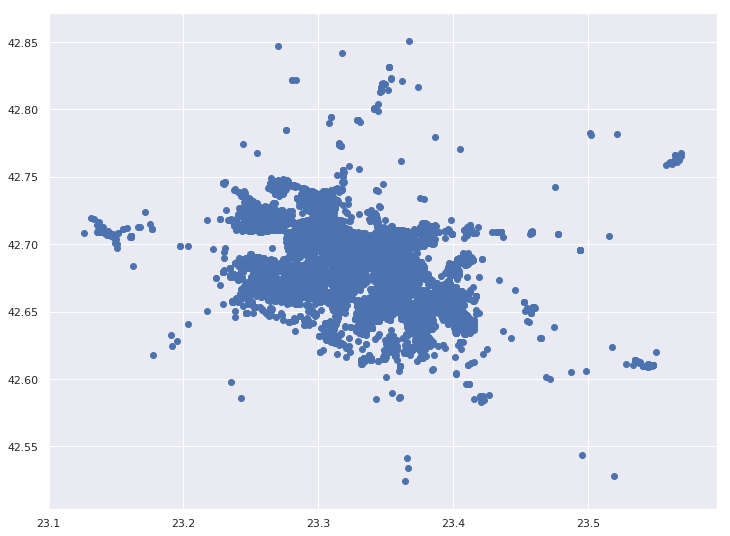